In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import eval

In [ ]:
e = eval.evaluation(df_path= '813_aggregated_median.csv')
con = e.norm_agg()
enr = e.eval(con, operation = 'enrichment')
prec = e.eval(con, operation = 'precision_recall')

In [3]:
hit_ls = e.eval(con, operation = 'hit@k')
bins = np.arange(0,200,5)
h, bins = np.histogram(hit_ls[0], bins=bins)
hit = pd.DataFrame()
hit['bins'] = bins[:-1]
hit['h'] = h

running hit@k


In [4]:
res = pd.concat([enr, prec, hit], ignore_index=False, axis=1)
res.to_csv('813_results.csv', index=False)

In [5]:
res

,enrichment_percentile,threshold,ods_ratio,p-value,k,precision,recall,bins,h
0,0.995,0.409413,14.786610,0.0,5.0,0.126316,0.003348,0,373
1,0.990,0.322445,10.111008,0.0,10.0,0.136842,0.007135,5,248
2,0.985,0.271454,7.776799,0.0,15.0,0.140351,0.010555,10,157
3,0.980,0.234997,6.426490,0.0,20.0,0.142105,0.014815,15,127
4,0.975,0.207857,5.506049,0.0,25.0,0.138947,0.017294,20,100
5,0.970,0.185757,4.910864,0.0,30.0,0.135088,0.020017,25,100
6,0.965,0.168152,4.413697,0.0,40.0,0.127632,0.025415,30,74
7,0.960,0.153741,4.091872,0.0,50.0,0.118947,0.029287,35,80
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,79
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45,61


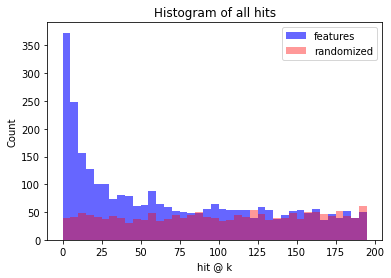

In [13]:
#%matplotlib qt
bins = np.arange(0,200,5)
plt.style.use({'figure.facecolor':'white'})
plt.hist(hit_ls[0], bins, alpha=0.6, color='blue', label='features')
plt.hist(hit_ls[1], bins,alpha=0.4, color='red', label='randomized')
plt.xlabel('hit @ k')
plt.ylabel('Count')
plt.title('Histogram of all hits')
plt.legend()
plt.show()

In [6]:
hit_ls[2]

{50: 985, 75: 1102, 100: 1134}

In [4]:
# compare to 811
e = eval.evaluation(df_path= '../811/811_aggregated_median.csv')
con = e.norm_agg()
comp_enr = e.eval(con, operation = 'enrichment')
comp_hit = e.eval(con, operation = 'precision_recall')
# comp_hit = e.eval(con, operation = 'hit@k')

1280 features were identified


In [11]:
comp_hit

,k,precision,recall
0,5.0,0.147368,0.003581
1,10.0,0.126316,0.006337
2,15.0,0.115789,0.008396
3,20.0,0.107895,0.010263
4,25.0,0.094737,0.011037


In [8]:
comp_hit[2]

{50: 890, 75: 974, 100: 1023}

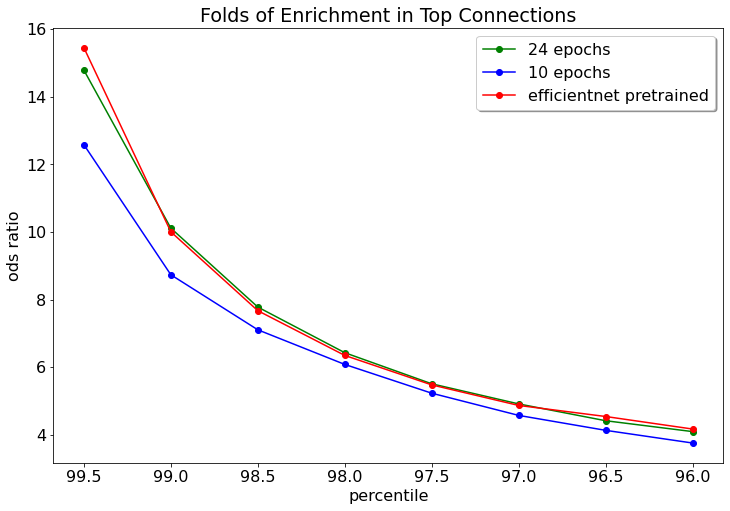

In [5]:
pre =  '/Users/mbornhol/git/neural-profiling/pre-trained/results/'
efficientnet_sphered = pd.read_csv(pre + 'res_enrichment_spherized.csv')

res_enr_baseline = pd.read_csv('/Users/mbornhol/git/neural-profiling/baseline/results/res_enrichment_baseline.csv')
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*res_enr["enrichment_percentile"], res_enr["ods_ratio"], marker="o", color="green", label = '24 epochs')
plt.plot(100*comp_enr["enrichment_percentile"], comp_enr["ods_ratio"], marker="o", color="blue", label = '10 epochs')
plt.plot(100*efficientnet_sphered["enrichment_percentile"], efficientnet_sphered["ods_ratio"], marker="o", color="red", label = 'efficientnet pretrained')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

# Precision recall



In [3]:
e = eval.evaluation(df_path= '813_aggregated_median.csv')
con = e.norm_agg()
res_pre = e.eval(con, operation = 'precision_recall')
res_pre.to_csv('813_precision.csv', index=False)

1280 features were identified


In [4]:
pre =  '/Users/mbornhol/git/neural-profiling/pre-trained/results/'
efficientnet_sphered = pd.read_csv(pre + 'res_prec_spherized.csv')
comp_enr = pd.read_csv('../811/811_precision.csv')

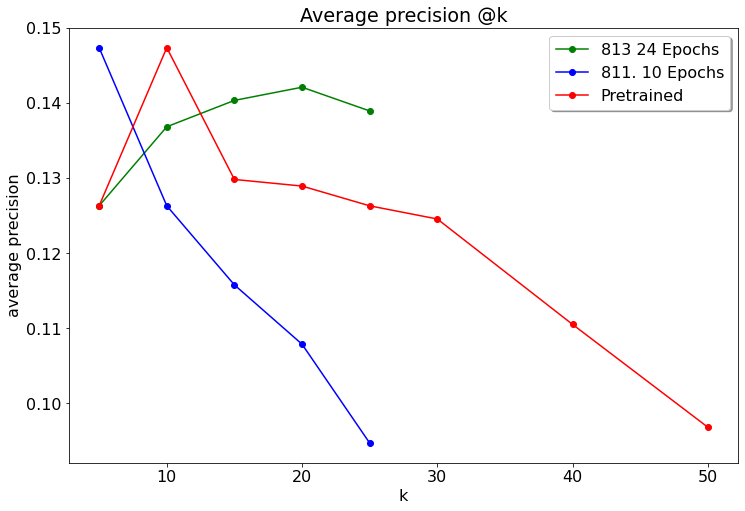

In [7]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(res_pre["k"], res_pre["precision"], marker="o", color="green", label = '813 24 Epochs')
plt.plot(comp_enr["k"], comp_enr["precision"], marker="o", color="blue", label = '811. 10 Epochs')
plt.plot(efficientnet_sphered["k"], efficientnet_sphered["precision"], marker="o", color="red", label = 'Pretrained')
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'upper right', shadow=True)
plt.show()

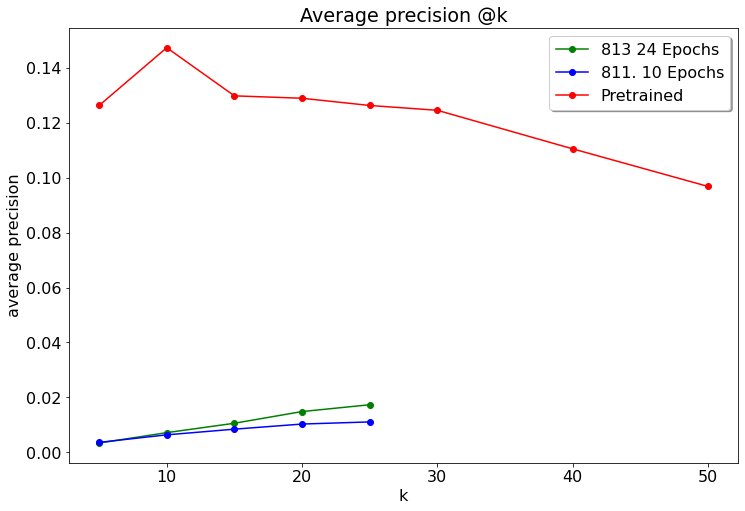

In [8]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(res_pre["k"], res_pre["recall"], marker="o", color="green", label = '813 24 Epochs')
plt.plot(comp_enr["k"], comp_enr["recall"], marker="o", color="blue", label = '811. 10 Epochs')
plt.plot(efficientnet_sphered["k"], efficientnet_sphered["precision"], marker="o", color="red", label = 'Pretrained')
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'upper right', shadow=True)
plt.show()


In [7]:
pd.read_csv('813_aggregated_median.csv').shape

/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(8745, 1298)